In [1]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
fb1=pd.read_csv('nysu_10902_2019Á´ãÂßî_research.csv')
fb2=pd.read_csv('nysu_10902_2019_research_right.csv')
fb=pd.merge(fb1,fb2,how="outer")
politics = pd.read_csv('9th_legislator_promise.csv')

‰ª•Âè∞ÂçóÂ∏ÇÁ¨¨‰∏âÈÅ∏ÂçÄÁ´ãÂßîÈô≥‰∫≠Â¶ÉÁÇ∫‰æãÔºå‰æùÁÖßÊúà‰ªΩ‰æÜÁµ±Ë®àÊï∏ÂÄºË≥áÊñôÁöÑËÆäÂåñ

In [2]:
fb.head(1)

post_id          page_id page_name page_category  \
0  244784245612709_2052039854887130  244784245612709       Èô≥Â≠∏ËÅñ          ÊîøÊ≤ª‰∫∫Áâ©   

                                             message story   type  \
0  ÈëíÊñº‰∏≠Ê≤πËßÄÂ°òÊ°àÂú®Áí∞Ë©ïÂ§ßÊúÉËøÖÈÄüÈÄöÈóúÔºåÂéüÂÖàÂ∞àÊ°àÂ∞èÁµÑËÄÉÈáèÂ∞çËóªÁ§ÅÁîüÊÖãÊúâÈáçÂ§ßÂΩ±ÈüøÔºåÂª∫Ë≠∞ÈÄÄÂõûÁõÆÁöÑ‰∫ãÊ•≠‰∏ªÁÆ°...   NaN  photo   

                                           permalink  \
0  https://www.facebook.com/244784245612709/posts...   

           created_time_gmt  created_time_taipei  ... link_name  \
0  2019-01-15T11:00:16+0000  2019-01-15T19:00:16  ...       NaN   

  link_description like_count  haha_count  love_count  angry_count  sad_count  \
0              NaN        144           0           0            0          0   

   wow_count  comment_count  share_count  
0          0              6            5  

[1 rows x 21 columns]

In [3]:
#ÊîøË¶ã ÊúâÂì™‰∫õÁ´ãÂßî
politics['ÂßìÂêç'].unique()

array(['Âê≥ÊÄùÁë§', 'ÂßöÊñáÊô∫', '‰ΩïÂøóÂÅâ', 'Ëî£Ëê¨ÂÆâ', 'ÊùéÂΩ•ÁßÄ', 'ÊûóÊò∂‰Ωê', 'Ëî£‰πÉËæõ', 'Ë≤ªÈ¥ªÊ≥∞', 'Ë≥¥Â£´ËëÜ',
       'ÂëÇ Â≠´ Á∂æ', 'Êûó Ê∑ë Ëä¨', 'È´òÂøóÈµ¨', '‰ΩôÂ§©', 'Âê≥ Áßâ Âè°', 'Ëòá Â∑ß ÊÖß', 'Âºµ ÂÆè Èô∏', 'ÁæÖ Ëá¥ Êîø',
       'Ê±ü Ê∞∏ Êòå', 'Êûó Âæ∑ Á¶è', 'Âê≥ Áê™ Èäò', 'ÁæÖ Êòé Êâç', 'ÈªÉ Âúã Êòå', 'Ëî°ÈÅ©Êáâ', 'ÈÑ≠ ÈÅã Èµ¨',
       'Èô≥Ë≥¥Á¥†Áæé', 'Èô≥Â≠∏ËÅñ', 'ÈÑ≠ÂØ∂Ê∏Ö', 'ÂëÇÁéâÁé≤', 'Ë∂ôÊ≠£ÂÆá', 'ÊûóÁÇ∫Ê¥≤', 'ÊüØÂª∫Èäò', 'Èô≥Ë∂ÖÊòé', 'ÂæêÂøóÊ¶Æ',
       'Ëî°ÂÖ∂Êòå', 'È°èÂØ¨ÊÅí', 'Ê¥™ÊÖàÂ∫∏', 'ÂºµÂªñËê¨Â†Ö', 'ÁõßÁßÄÁáï', 'Ê≤àÊô∫ÊÖß', 'ÈªÉÂúãÊõ∏', '‰ΩïÊ¨£Á¥î', 'Ê±üÂïüËá£',
       'ÁéãÊÉ†Áæé', 'ÊüØÂëàÊûã', 'ÈªÉÁßÄËä≥', 'Ê¥™ÂÆóÁÜ†', 'Èô≥Á¥†Êúà', 'È¶¨ Êñá Âêõ', 'Ë®± Ê∑ë ËèØ', 'Ëòá Ê≤ª Ëä¨',
       'Âäâ Âª∫ Âúã', 'Êùé ‰øä ‰øã', 'Ëî° Êòì È§ò', 'Èô≥ Êòé Êñá', 'ËëâÂÆúÊ¥•', 'ÈªÉÂÅâÂì≤', 'ÈÉ≠ÂúãÊñá  ', 'Èô≥‰∫≠Â¶É',
       'Êûó‰øäÊÜ≤', 'ÁéãÂÆöÂÆá', 'ÈÇ± Ë≠∞ Áë©', 'ÈÇ± Âøó ÂÅâ', 'Âäâ ‰∏ñ Ëä≥', 'Êûó Â≤± Ê®∫', 'ÁÆ° Á¢ß Áé≤', 'Êùé ÊòÜ Êæ§',
       'Ë∂ô Â§© È∫ü', 'È¶¨ Âá± 

In [4]:
#fb Á∏ΩÂÖ±ÊúâÂì™‰∫õÁ´ãÂßî
fb['page_name'].unique()

array(['Èô≥Â≠∏ËÅñ', 'Èô≥ÊòéÊñá', 'Ëî°ÂÖ∂Êòå', 'Ë∂ôÂ§©È∫ü', 'Ë®±Ê∑ëËèØ', 'ÊûóÊò∂‰Ωê Freddy Lim', 'Ëî°ÈÅ©Êáâ', 'ËëâÂÆúÊ¥•',
       'ËòáÈúáÊ∏Ö', 'ÊùéÊòÜÊæ§', 'ÊüØÂëàÊûã', 'Èô≥‰∫≠Â¶É', 'È°èÂØ¨ÊÅí', 'Èô≥Ë≥¥Á¥†Áæé Á≤âÁµ≤Âúò', 'ÂëÇÂ≠´Á∂æ', 'Á´ãÊ≥ïÂßîÂì° Ê±üÊ∞∏Êòå',
       'ÂæêÂøóÊ¶Æ', 'Èô≥ÁéâÁèç ÁèçÊÑõÈáëÈñÄ', 'Ê≤àÊô∫ÊÖß', 'Ë≥¥ÁëûÈöÜ', 'Ë∂ôÊ≠£ÂÆá', 'Ëï≠ÁæéÁê¥ Bi-khim Hsiao', 'Ê¥™ÊÖàÂ∫∏',
       'ÁÆ°Á¢ßÁé≤ (kuanbiling)', 'Êùé‰øä‰øã', 'Âê≥Áê™Èäò', 'Âê≥ÊÄùÁë§', 'ÊûóÂ≤±Ê®∫', 'Ê±üÂïüËá£', 'ÈÑ≠ÂØ∂Ê∏Ö',
       'Ë≥¥Â£´ËëÜ', 'ÈÇ±ÂøóÂÅâ', 'ËòáÂ∑ßÊÖß', 'ÈªÉÁßÄËä≥', 'ÁéãÂÆöÂÆá', 'ÂºµÂÆèÈô∏', 'Â†ÖÊåÅÔºéÂºµÂªñËê¨Â†Ö', 'ÊùéÂΩ•ÁßÄ', 'ÊûóÂæ∑Á¶è',
       'ÈªÉÂúãÊòå', 'ÊûóÊ∑ëËä¨', 'Á´ãÊ≥ïÂßîÂì°ÊûóÁÇ∫Ê¥≤', 'Ëî°ÊòìÈ§ò ÂÆ∂Â∑±‰∫∫', 'ÊÑõ‰ø°‰ªª-Âäâ‰∏ñËä≥', 'È´òÈõÑÂ∞èÈáëÂâõË®±Êô∫ÂÇë', 'ËòáÊ≤ªËä¨',
       'ÁæÖËá¥ÊîøÁ≤âÁµ≤Âúò', 'ÁæÖÊòéÊâç', 'ÂäâÂª∫Âúã', '‰ΩïÊ¨£Á¥î', 'Á´ãÊ≥ïÂßîÂì° ÂëÇÁéâÁé≤', 'ÈªÉÂúãÊõ∏', 'Âê≥ÁßâÂè°', 'ÂäâÊ´ÇË±™',
       'ÊüØÂª∫Èäò'], dtype=object)

In [5]:
chen = fb[fb.page_name == "Èô≥‰∫≠Â¶É"]
# ÊääÊôÇÈñìÊ†ºÂºèËΩâÊèõ
chen['new_date'] = pd.to_datetime(chen['created_time_taipei']).dt.date
chen['post_hour'] = pd.to_datetime(chen['created_time_taipei']).dt.hour #ÊâæÂá∫ÁôºÊñá 'ÊôÇÈñì'(hour)
chen['month_year'] = pd.to_datetime(chen['new_date']).dt.to_period('M')
chen.head(1)

<ipython-input-5-4fd6dd8d772c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chen['new_date'] = pd.to_datetime(chen['created_time_taipei']).dt.date
<ipython-input-5-4fd6dd8d772c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chen['post_hour'] = pd.to_datetime(chen['created_time_taipei']).dt.hour #ÊâæÂá∫ÁôºÊñá 'ÊôÇÈñì'(hour)
<ipython-input-5-4fd6dd8d772c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

post_id          page_id page_name  \
5922  111224078898553_2159899594030981  111224078898553       Èô≥‰∫≠Â¶É   

     page_category                                            message story  \
5922          ÊîøÊ≤ª‰∫∫Áâ©  ‰∫ãÂØ¶Ë≠âÊòé‰∫ÜÔºåÊàëÂÄëÂ§ßÂÆ∂Áï∂ÂàùÁöÑÂ†ÖÊåÅÊòØÊ≤íÊúâÈåØÁöÑÔºÅ\n\nÁÆ°‰∏≠ÈñîÈùûÊ≥ïÂÖºËÅ∑‰∏ÄÁõ¥‰ª•‰æÜÈÉΩÊòØÊó¢Êúâ‰∫ãÂØ¶Ôºå‰ΩÜÊúâÂøÉ...   NaN   

      type                                          permalink  \
5922  link  https://www.facebook.com/111224078898553/posts...   

              created_time_gmt  created_time_taipei  ... haha_count  \
5922  2019-01-15T07:01:12+0000  2019-01-15T15:01:12  ...          0   

     love_count angry_count  sad_count  wow_count  comment_count  share_count  \
5922          0           0          0          0             59           36   

        new_date  post_hour  month_year  
5922  2019-01-15         15     2019-01  

[1 rows x 24 columns]

In [6]:
#ÁôºÊñáÊôÇÈñìÂàÜ‰Ωà
post_time = chen[['post_id','post_hour']].groupby('post_hour').count()
post_time.index.name = 'post_hour'
post_time.reset_index(inplace = True)
post_time

post_hour  post_id
0           0        1
1           1        1
2           3        1
3           5        6
4           6       20
5           7       35
6           8       29
7           9       36
8          10       34
9          11       37
10         12       37
11         13       20
12         14       30
13         15       31
14         16       25
15         17       29
16         18       28
17         19       20
18         20       24
19         21       19
20         22       18
21         23       11

In [7]:
chen[chen.created_time_taipei == max(chen.created_time_taipei)]
#ÊâæÂá∫ÊôÇÈñìÊúÄÊôöÁöÑË≤ºÊñá

post_id          page_id page_name  \
6375  111224078898553_594882728015592  111224078898553       Èô≥‰∫≠Â¶É   

     page_category                                            message  \
6375          ÊîøÊ≤ª‰∫∫Áâ©  È°ßÂè∞ÁÅ£ ‰Ωú‰ºôË°å\nÂ∞±ÊòØÁèæÂú®ÔºåÂæõÂá∫‰æÜÔºÅÁî≤Âí±‰Ωú‰ºôË°åÔºÅ‰Ωú‰ºôÂÆàË≠∑Âè∞ÁÅ£ÔºÅ\n\n‚ë¢ Èô≥‰∫≠Â¶É ‚ë¢ Ëî°Ëã±Êñá...   

          story   type                                          permalink  \
6375  Èô≥‰∫≠Â¶ÉÁöÑÁõ¥Êí≠ÂΩ±Áâá„ÄÇ  video  https://www.facebook.com/fififans/videos/59488...   

              created_time_gmt  created_time_taipei  ... haha_count  \
6375  2020-01-10T11:06:32+0000  2020-01-10T19:06:32  ...          0   

     love_count angry_count  sad_count  wow_count  comment_count  share_count  \
6375          0           0          0          0            228           40   

        new_date  post_hour  month_year  
6375  2020-01-10         19     2020-01  

[1 rows x 24 columns]

In [8]:
chen[chen.created_time_taipei == min(chen.created_time_taipei)]
#ÊâæÂá∫ÊôÇÈñìÊúÄÊó©ÁöÑË≤ºÊñá

post_id          page_id page_name  \
5927  111224078898553_2141770972510510  111224078898553       Èô≥‰∫≠Â¶É   

     page_category                                            message story  \
5927          ÊîøÊ≤ª‰∫∫Áâ©  Èù¢Â∞ç‰∏≠Âúã‰∏çÊñ∑ÁöÑÊñáÊîªÊ≠¶ÂöáÔºåË∫´ÁÇ∫Âè∞ÁÅ£‰∫∫ÁöÑÊàëÂÄëÔºåË©≤ÂÅöÁöÑÁµïÂ∞ç‰∏çÊòØÂçëË∫¨Â±àËÜùÔºÅ\n\nÔºÉÂè∞ÁÅ£‰∏≠Âúã‰∏ÄÈÇä‰∏ÄÂúã...   NaN   

      type                                          permalink  \
5927  link  https://www.facebook.com/111224078898553/posts...   

              created_time_gmt  created_time_taipei  ... haha_count  \
5927  2019-01-02T12:25:28+0000  2019-01-02T20:25:28  ...          0   

     love_count angry_count  sad_count  wow_count  comment_count  share_count  \
5927          0           0          0          0             24           12   

        new_date  post_hour  month_year  
5927  2019-01-02         20     2019-01  

[1 rows x 24 columns]

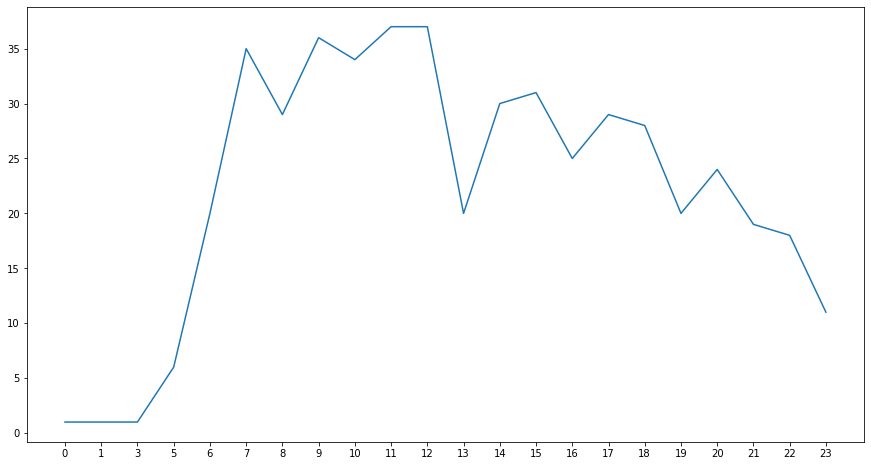

In [9]:
#Áï´Âá∫Êï¥Âπ¥Ë≤ºÊñáÂàÜ‰Ωà
labels = post_time['post_hour'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, post_time['post_id'])

plt.show()

In [10]:
#Êï¥Âπ¥Ë≤ºÊñáÊï∏ÈáèÂàÜ‰Ωà
whole_year = chen[['post_id','month_year']].groupby('month_year').count()
whole_year.index.name = 'month_year'
whole_year.reset_index(inplace=True)
whole_year

month_year  post_id
0     2019-01       18
1     2019-02       16
2     2019-03       34
3     2019-04       20
4     2019-05       22
5     2019-06       26
6     2019-07       28
7     2019-08       50
8     2019-09       43
9     2019-10       66
10    2019-11       74
11    2019-12       70
12    2020-01       25

In [11]:
#ÊØèÂÄãÊúàÂπ≥ÂùáÁôºÊñáÊï∏ÈáèÁµ±Ë®àÂÄº
whole_year.describe()

post_id
count  13.000000
mean   37.846154
std    20.747876
min    16.000000
25%    22.000000
50%    28.000000
75%    50.000000
max    74.000000

In [12]:
results = chen.groupby('month_year').sum()
results

page_id  like_count  haha_count  love_count  angry_count  \
month_year                                                                      
2019-01     2002033420173954       13078           0           0            0   
2019-02     1779585262376848       12376           0           0            0   
2019-03     3781618682550802       29350           0           0            0   
2019-04     2224481577971060       30125           0           0            0   
2019-05     2446929735768166       42679           0           0            0   
2019-06     2891826051362378       37857           0           0            0   
2019-07     3114274209159484       38827           0           0            0   
2019-08     5561203944927650      107186           0           0            0   
2019-09     4782635392637779       68870           0           0            0   
2019-10     7340789207304498      117788           0           0            0   
2019-11     8230581838492922      143867           0           0            0   
2019-12     7785685522898710      150194           0           0            0   
2020-01     2780601972463825       59331           0           0            0   

            sad_count  wow_count  comment_count  share_count  post_hour  
month_year                                                               
2019-01             0          0            921          467        271  
2019-02             0          0           1118          254        256  
2019-03             0          0           2716          542        469  
2019-04             0          0           2028          383        216  
2019-05             0          0           3450          538        239  
2019-06             0          0           2071          775        396  
2019-07             0          0           2108          811        428  
2019-08             0          0           4008         1139        660  
2019-09             0          0           2821          719        572  
2019-10             0          0           5044         1472        786  
2019-11             0          0           5048         1563        988  
2019-12             0          0           7496         1688        998  
2020-01             0          0           3037         1148        317

In [13]:
results.index.name = 'newhead' #Â∞á‰∏äË°åÂÆöÁæ©Âá∫ÁöÑresultsÁ¥¢ÂºïÊ®ôÁ±§ÂëΩÂêçÁÇ∫newhead
results.reset_index(inplace=True)#Â∞áË¢´ÈáçÊñ∞ÂëΩÂêçÈÅéÁöÑÁ¥¢ÂºïÊ®ôÁ±§ÂõûÂæ©ÊàêÁ≥ªÁµ±Êú¨‰æÜÁöÑÊéíÂàóÔºåÂÄã‰∫∫Ë¶∫ÂæóÊÑèÁæ©‰∏çÂ§ß
results

newhead           page_id  like_count  haha_count  love_count  \
0   2019-01  2002033420173954       13078           0           0   
1   2019-02  1779585262376848       12376           0           0   
2   2019-03  3781618682550802       29350           0           0   
3   2019-04  2224481577971060       30125           0           0   
4   2019-05  2446929735768166       42679           0           0   
5   2019-06  2891826051362378       37857           0           0   
6   2019-07  3114274209159484       38827           0           0   
7   2019-08  5561203944927650      107186           0           0   
8   2019-09  4782635392637779       68870           0           0   
9   2019-10  7340789207304498      117788           0           0   
10  2019-11  8230581838492922      143867           0           0   
11  2019-12  7785685522898710      150194           0           0   
12  2020-01  2780601972463825       59331           0           0   

    angry_count  sad_count  wow_count  comment_count  share_count  post_hour  
0             0          0          0            921          467        271  
1             0          0          0           1118          254        256  
2             0          0          0           2716          542        469  
3             0          0          0           2028          383        216  
4             0          0          0           3450          538        239  
5             0          0          0           2071          775        396  
6             0          0          0           2108          811        428  
7             0          0          0           4008         1139        660  
8             0          0          0           2821          719        572  
9             0          0          0           5044         1472        786  
10            0          0          0           5048         1563        988  
11            0          0          0           7496         1688        998  
12            0          0          0           3037         1148        317

In [14]:
results['newhead'].map(str)#Â∞áÁ¥¢ÂºïÊ®ôÁ±§newheadÈÇ£Ê¨Ñ‰∏≠ÊâÄÊúâË≥áÊñôËΩâÁÇ∫Â≠ó‰∏≤Ê†ºÂºè

0     2019-01
1     2019-02
2     2019-03
3     2019-04
4     2019-05
5     2019-06
6     2019-07
7     2019-08
8     2019-09
9     2019-10
10    2019-11
11    2019-12
12    2020-01
Name: newhead, dtype: object

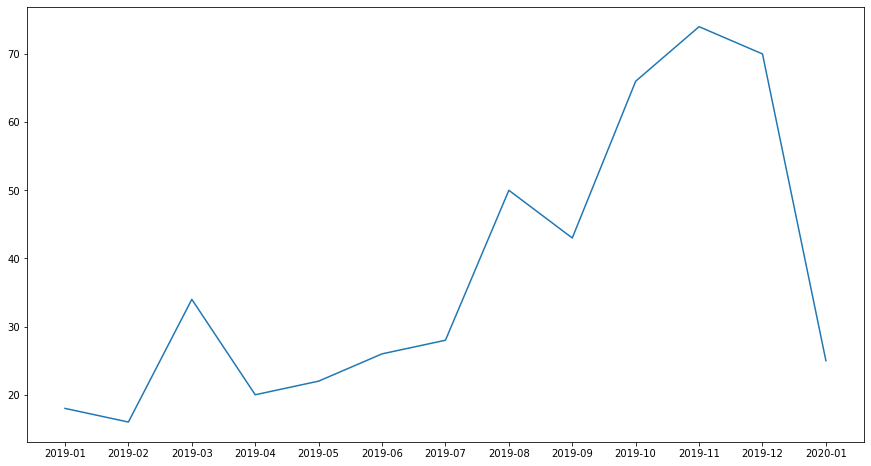

In [15]:
#Áï´Âá∫Êï¥Âπ¥Ë≤ºÊñáÂàÜ‰Ωà
labels = results['newhead'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, whole_year['post_id'])

plt.show()

In [16]:
# ÊØèÂÄãÊúàÁöÑÊåâËÆö„ÄÅË©ïË´ñ„ÄÅÂàÜ‰∫´Á∏ΩÊï∏ ÂàÜ‰Ωà
results = chen.groupby('month_year').sum()
results.index.name = 'newhead'
results.reset_index(inplace=True)
results

newhead           page_id  like_count  haha_count  love_count  \
0   2019-01  2002033420173954       13078           0           0   
1   2019-02  1779585262376848       12376           0           0   
2   2019-03  3781618682550802       29350           0           0   
3   2019-04  2224481577971060       30125           0           0   
4   2019-05  2446929735768166       42679           0           0   
5   2019-06  2891826051362378       37857           0           0   
6   2019-07  3114274209159484       38827           0           0   
7   2019-08  5561203944927650      107186           0           0   
8   2019-09  4782635392637779       68870           0           0   
9   2019-10  7340789207304498      117788           0           0   
10  2019-11  8230581838492922      143867           0           0   
11  2019-12  7785685522898710      150194           0           0   
12  2020-01  2780601972463825       59331           0           0   

    angry_count  sad_count  wow_count  comment_count  share_count  post_hour  
0             0          0          0            921          467        271  
1             0          0          0           1118          254        256  
2             0          0          0           2716          542        469  
3             0          0          0           2028          383        216  
4             0          0          0           3450          538        239  
5             0          0          0           2071          775        396  
6             0          0          0           2108          811        428  
7             0          0          0           4008         1139        660  
8             0          0          0           2821          719        572  
9             0          0          0           5044         1472        786  
10            0          0          0           5048         1563        988  
11            0          0          0           7496         1688        998  
12            0          0          0           3037         1148        317

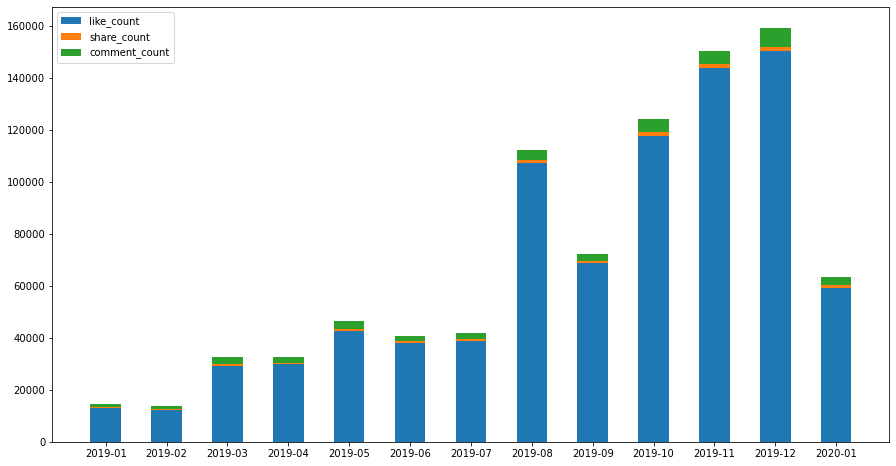

In [17]:
#Êï¥Âπ¥ÊåâËÆö„ÄÅË©ïË´ñ„ÄÅÂàÜ‰∫´Êï∏

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])
#ax.plot(labels, whole_year['post_id'])

ax.legend()
plt.show()

In [19]:
# ÂæàÊòéÈ°Ø8ÊúàÊåâËÆö„ÄÅÂàÜ‰∫´„ÄÅË©ïË´ñÊï∏ÁâπÂà•È´òÔºåÂõ†Ê≠§ÊâæÂá∫8ÊúàÁöÑË≥áÊñô
high = chen[chen.month_year == "2019-08"]
results_high = high.groupby('new_date').sum()
results_high.index.name = 'newhead' #Êõ¥ÊîπÊ¨Ñ‰ΩçÂêçÁ®±
results_high.reset_index(inplace=True)
results_high

newhead          page_id  like_count  haha_count  love_count  \
0   2019-08-01  111224078898553        1104           0           0   
1   2019-08-02  222448157797106        3094           0           0   
2   2019-08-03  222448157797106        2908           0           0   
3   2019-08-04  333672236695659       14359           0           0   
4   2019-08-05  222448157797106        2133           0           0   
5   2019-08-06  222448157797106        6038           0           0   
6   2019-08-07  222448157797106        3900           0           0   
7   2019-08-08  222448157797106        4793           0           0   
8   2019-08-09  111224078898553         868           0           0   
9   2019-08-10  111224078898553         799           0           0   
10  2019-08-11  111224078898553        4776           0           0   
11  2019-08-12  222448157797106        1714           0           0   
12  2019-08-13  222448157797106        9050           0           0   
13  2019-08-14  111224078898553         508           0           0   
14  2019-08-15  111224078898553        3929           0           0   
15  2019-08-16  111224078898553        5114           0           0   
16  2019-08-17  222448157797106        3206           0           0   
17  2019-08-19  222448157797106        1882           0           0   
18  2019-08-20  222448157797106        1918           0           0   
19  2019-08-21  222448157797106        1711           0           0   
20  2019-08-22  222448157797106        2151           0           0   
21  2019-08-23  333672236695659        5002           0           0   
22  2019-08-24  111224078898553         648           0           0   
23  2019-08-25  111224078898553        3523           0           0   
24  2019-08-26  111224078898553        5127           0           0   
25  2019-08-27  111224078898553        1495           0           0   
26  2019-08-28  111224078898553        1055           0           0   
27  2019-08-29  111224078898553        3284           0           0   
28  2019-08-30  111224078898553        5274           0           0   
29  2019-08-31  444896315594212        5823           0           0   

    angry_count  sad_count  wow_count  comment_count  share_count  post_hour  
0             0          0          0             25           11         17  
1             0          0          0             99           27         37  
2             0          0          0             65           50         25  
3             0          0          0            416          224         47  
4             0          0          0             44           47         28  
5             0          0          0            145           79         28  
6             0          0          0            106           25         28  
7             0          0          0            166           18         14  
8             0          0          0             19           11         18  
9             0          0          0             26            6         15  
10            0          0          0            196           21          8  
11            0          0          0            112           62         27  
12            0          0          0            446           92         14  
13            0          0          0             31            7          8  
14            0          0          0            109           16         21  
15            0          0          0            165           18         11  
16            0          0          0            136           17         26  
17            0          0          0            149           28         35  
18            0          0          0            221           36         30  
19            0          0          0            124           50         23  
20            0          0          0             94           48         23  
21            0          0          0            123           43  

No handles with labels found to put in legend.


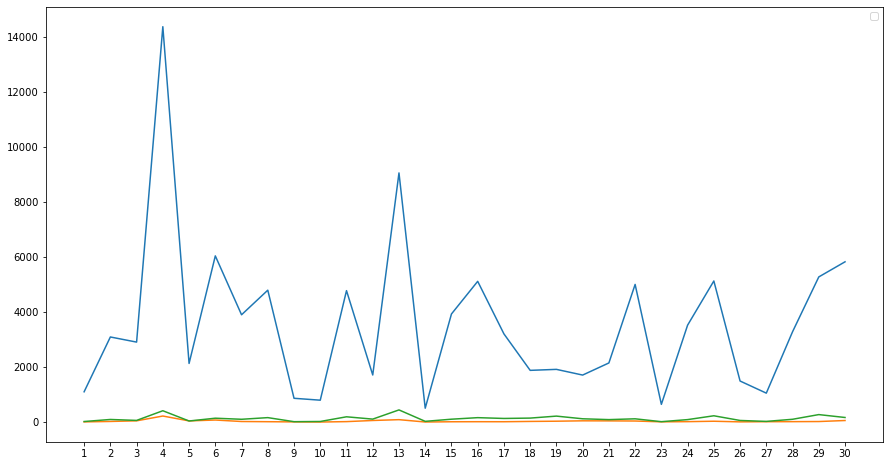

In [20]:
#Áï´Âúñ ÁúãÊï¥ÂÄãÂÖ´ÊúàÊåâËÆö„ÄÅÂàÜ‰∫´„ÄÅË©ïË´ñÁöÑÊµÅÈáè
labels = [str(i) for i in range(1,31)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_high['like_count'])
ax.plot(labels, results_high['share_count'])
ax.plot(labels, results_high['comment_count'])

ax.legend()

plt.show()

In [21]:
# 8/4 ËôüÂæàÊòéÈ°ØÊåâËÆöÊúÄÈ´ò  Âõ†Ê≠§ÊâæÂá∫ÈÄôÂ§©ÁöÑÊñáÁ´†
chen['new_date']=chen['new_date'].map(str) # turn 'new_date' into str
Aug_04 = chen[chen['new_date'] == "2019-08-04"]
Aug_04[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-21-fd14d33afaac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chen['new_date']=chen['new_date'].map(str) # turn 'new_date' into str


message  comment_count  \
6098  ÊàëÂÄëÊää‰∏ñÁïåÂÜ†ËªçÁïôÂú®Âè∞ÁÅ£‰∫ÜüèÜüèÜüèÜ  Ë¨ùË¨ùÂÑ™ÁßÄÁöÑÂè∞ÁÅ£Â∞èÂ∞áÔºÅ  ‰ªäÂ§©ÈÄô‰ªΩÊ¶ÆËÄÄÁµïÂ∞çÊòØÂ±¨Êñº‰Ω†ÂÄëÁöÑÔºÅ  ...            139   
6099  U12Âè∞ÁÅ£Â∞èÂ∞áÂä†Ê≤πÔºÅÊääÂÜ†ËªçÁïôÂú®Âè∞ÁÅ£ÔºÅ  üìåÁ∑ö‰∏äÁõ¥Êí≠Á∂≤ÂùÄÔºöhttp://bit.ly/2KBIf7J            155   
6100  Êó©ÂÆâÂ•ΩÂèãÂÄëÔºÅÁ∑äÊÄ•ËôüÂè¨ÔºÅ  ‰ªäÊôöU12ÂÜ†‰∫ûËªçÁ∏ΩÊ±∫Ë≥ΩÊòØÁî±Âú∞‰∏ªÂè∞ÁÅ£Â∞ç‰∏äÊó•Êú¨ÈöäÔºåË®òÂæóÊ∫ñÊôÇ‰∏äÁ∑öÂπ´Âè∞ÁÅ£Â∞è...            122   

      like_count  
6098        6044  
6099        3878  
6100        4437

In [22]:
#ÊâæÂá∫Ë©ïË´ñÊï∏ÈáèÁöÑÁµ±Ë®àÂÄº
chen['comment_count'].describe()

count     492.000000
mean       85.093496
std        95.104848
min         6.000000
25%        27.750000
50%        55.000000
75%       104.250000
max      1019.000000
Name: comment_count, dtype: float64

In [23]:
#ÊâæÂá∫ÊåâËÆöÊï∏ÈáèÁöÑÁµ±Ë®àÂÄº
chen['like_count'].describe()


count     492.000000
mean     1730.747967
std      1409.379609
min       180.000000
25%       762.500000
50%      1268.000000
75%      2234.000000
max      8037.000000
Name: like_count, dtype: float64

In [24]:
# ÊØîËºÉ„ÄÅÊü•Áúã‰ªñÊîøË¶ã
promise = politics[politics.ÂßìÂêç == "Èô≥‰∫≠Â¶É"].ÊîøË¶ã.to_string()
re.split('„ÄÇ |Ôºö', promise) # skip this, just to make it easier to read

['57    Â†ÖÊåÅÂè∞ÁÅ£‰∏ªÈ´îÊÄßÔºåÂº∑ÂåñÂúãÂÆ∂Á´∂Áà≠ÂäõËàáÂúãÈöõÈÄ£ÁµêÔºåÂäõÊé®Âè∞ÁÅ£ÊàêÁÇ∫Ê≠£Â∏∏ÂåñÂúãÂÆ∂', '‰∏Ä„ÄÅÊé®ÂãïÂÆåÊàê18Ê≠≤ÂÖ¨Ê∞ëÊ¨ä...']

In [25]:
#ÊåâËÆöÊ¨°Êï∏ÊúÄÂ∞ëÁöÑË≤ºÊñá 
lastlike_10 = chen.sort_values(by = ['like_count'],ascending = True).head(10)
lastlike_10[['message','like_count','month_year']].replace(r'\n',' ',regex=True)

message  like_count month_year
5987  Êàë‰ªäÂ§©ÈáùÂ∞ç‰∏≠ÂúãÊúÄÂ§ßÁöÑÂΩ±Èü≥‰∏≤ÊµÅÂπ≥Âè∞„ÄåÈ®∞Ë®äË¶ñÈ†ª„ÄçÂ∞áÂæ™„ÄåÊÑõÂ•áËóù„ÄçÊ®°Âºè‰æÜÂè∞Ë≥™Ë©¢„ÄÅÊèêÈÜíÁ∂ìÊøüÈÉ®ÈÉ®Èï∑Ê≤àÊ¶ÆÊ¥•...         180    2019-03
6130  ‰∏≠ÁßãÁ´ãÂßî‰∏çÁÉ§ËÇâÔºåÁé©Ëµ∑‰∫§ÊèõÁ¶ÆÁâ©‚Åâ 12Á´ãÂßîÁ¶ÆÁâ©Â§ßPKÁõ¥Êí≠‰æÜÂõâÔºÅ „ÄÄ„ÄÄ ÁúãÁúãÂ§ßÂÆ∂Âà∞Â∫ïÊãøÂá∫‰ªÄÈ∫ºÂ£ìÁÆ±...         194    2019-09
5959                                  ‚ñ∂ #‰∏âÁ´ãÂâçÈÄ≤Êñ∞Âè∞ÁÅ£ Part 2         211    2019-03
6063  #ÂÅáÊñ∞ËÅûÊ∏ÖÊΩîÂäë ÊòØ‰∏ÄÂÄãËá¥ÂäõÊñºÈ†êÈò≤ÂÅáÊ∂àÊÅØÁöÑË°óÈ†≠Ë°åÂãïÂúòÈ´îÔºåÂ∞ç‰∏çÁÜüÊÇâÁ∂≤Ë∑Ø‰∏ñÁïåÁöÑÈï∑Ëº©ÂÄë‰æÜË™™ÔºåÂÅáÊñ∞ËÅûÂÖ∂...         218    2019-07
5968  ÊØèÂπ¥ÈõªÂÉπÁöÑË™øÊº≤ËàáÂê¶Ôºå‰∏ÄÁõ¥‰ª•‰æÜÈÉΩÊòØÂ§ßÂÆ∂ÊúÄÈóúÂøÉÁöÑÊ∞ëÁîüË≠∞È°å„ÄÇ  ÊâÄ‰ª•Âú®Á∂ìÊøüÂßîÂì°ÊúÉË≥™Ë©¢ÊôÇÔºåÊàëÁâπÂú∞Ë´ãÁ∂ì...         225    2019-03
5993  Á∂ìÊøüÂßîÂì°ÊúÉË≥™Ë©¢Ëæ≤ÂßîÊúÉÈô≥Âêâ‰ª≤‰∏ªÂßî-Â¶Ç‰ΩïÈò≤Ê≤ªÂÅáÊ∂àÊÅØ.ÂÅáÊñ∞ËÅû  ‰∫≠Â¶ÉÈô§ÊèêÂá∫„ÄåËæ≤Áî¢ÂìÅÂ∏ÇÂ†¥‰∫§ÊòìÊ≥ïÁ¨¨ÂÖ≠Ê¢ù...         237    2019-04
5962  Á†ÇÁü≥ËàáÊ∑∑Ê≥•ÂúüÂÉπÊ†º‰∏äÊº≤ÁöÑÂïèÈ°åÂ∑≤Á∂ì1„ÄÅ2ÂÄãÊúà‰∫ÜÔºåÂà∞Â∫ïÂêà‰∏çÂêàÁêÜÔºåÊòØÂê¶ÊúâÂ£üÊñ∑ÔºüÂÖ¨Âπ≥ÊúÉÂ∞öÊú™ÊúâÁ≠îÊ°à  ËÄå...         242    2019-03
5956  ÂÖÉÂÆµÁáàÁ±†DIY‚Ä¢ÂÅ•Â∫∑Ë¶™Â≠êÊ®Ç Èô≥‰∫≠Â¶ÉÁÜ±ÊÉÖÈÇÄË´ãÊÇ® ÂêåÊ®ÇÊÖ∂ÂÖÉÂÆµ  ÊôÇÈñìÔºö2/17ÈÄ±Êó•‰∏äÂçà10ÈªûÂà∞1...         251    2019-02
6026               ÈáùÂ∞ç„ÄåÂè∞ÂåóÂ∏ÇÈõôÂ≠êÊòüËÅØÂêàÈñãÁôºÊ°àÊòØÂê¶Ê∂âÂèä‰∏≠Ë≥á‰ªãÂÖ•ÂèäÂúãÂÆâÂïèÈ°åÁ≠âÁà≠Ë≠∞„ÄçË≥™Ë©¢Á∂ìÊøüÈÉ®         275    2019-05
6195              Êó©ÂÆâÔºÅ Â§©Â§©ÊïôÂ∏´ÁØÄÔºå‰∏ÄÂÆöË¶ÅÂíåÂ•ΩÂèãÂÄëÂàÜ‰∫´‰∏ÄÊÆµË∂ÖÂèØÊÑõÁöÑÂΩ±ÁâáÔºåÁ•ùÁ¶èËÄÅÂ∏´Â§©Â§©Âø´Ê®ÇÔºÅ         276    2019-09

In [26]:
#Èô≥‰∫≠Â¶ÉÁöÑÊúÄÂ∞ëËÆöÊï∏Ââç10ÁöÑÊñáÁ´†ÁöÑ Á®ÆÈ°û video / photo?
lastlike_10 = chen.sort_values(by = ['like_count'],ascending= True ).head(10)
lastlike_10.groupby('type').count()

post_id  page_id  page_name  page_category  message  story  permalink  \
type                                                                           
link         1        1          1              1        1      0          1   
video        9        9          9              9        9      4          9   

       created_time_gmt  created_time_taipei  link_url  ...  haha_count  \
type                                                    ...               
link                  1                    1         1  ...           1   
video                 9                    9         9  ...           9   

       love_count  angry_count  sad_count  wow_count  comment_count  \
type                                                                  
link            1            1          1          1              1   
video           9            9          9          9              9   

       share_count  new_date  post_hour  month_year  
type                                                 
link             1         1          1           1  
video            9         9          9           9  

[2 rows x 23 columns]

In [27]:
#ÊåâËÆöÊ¨°Êï∏ÊúÄÂ§öÁöÑË≤ºÊñá 
mostlike_10 = chen.sort_values(by = ['like_count'],ascending = False).head(10)
mostlike_10[['message','like_count','month_year']].replace(r'\n',' ',regex=True)

message  like_count month_year
6305      Â¶ÉÂ¶ÉÂéªÂì™ÂÖíPart2 ‰Ω†ÊúâÈÅáÂà∞ÊàëÂóéüòç „ÄÄ„ÄÄ„ÄÄ„ÄÄ„ÄÄ #Â¶ÉÂ¶ÉÂéªÂì™ÂÖí #ÂÅúÁ¥ÖÁáàË´ãÊ≥®ÊÑè #ÈáéÁîüÂ¶ÉÂ¶É        8037    2019-11
6295  Ë¨ùË¨ùÂ§ßÂÆ∂ÁöÑÂèÉËàáÔºå‰ªäÂ§©„ÄåÂ¶ÉÂ¶ÉÂßêÂßêË¶™Â≠êÊ¥ªÂäõÊ¥æÂ∞ç„ÄçÂ§ßÁàÜÊªø‚Äº ‰∫≠Â¶ÉÂåñË∫´Â≠©Â≠êÁéã‰πüÁé©ÂæóÂ•ΩÈñãÂøÉüòÅ‰∏çË¶ÅÂøòË®ò1...        7864    2019-11
6083                               Èõ®Ë°£„ÄÅÈõ®ÈûãÂÖ®ÂâØÊ≠¶Ë£ùË∑ëË°åÁ®ãÔºåÁû≠Ëß£ÂêÑÂçÄÁãÄÊ≥ÅÔºÅ        7187    2019-08
6278  Âó®ÔºÅ‰ªäÂ§©ÁöÑÂ¶ÉÂ¶ÉÂßêÂßêÊ¥æÂ∞çÂ•ΩÁé©ÂóéÔºü‰∏çËÉΩ‰æÜ‰πüÊ≤íÈóú‰øÇÔºåÁèæÂ†¥Ëä±ÁµÆÂ†±‰Ω†Êê∂ÂÖàÁúãÂñî‚ò∫  ¬∑         ...        6970    2019-11
6397  ÊàëÂÄëÈúÄË¶Å‰πæÊ∑®ÁöÑÈÅ∏ËàâÔΩûÊãíÁµïÊîªÊìä„ÄÅÊãíÁµïÊäπÈªë„ÄÅÊãíÁµïË≥ÑÈÅ∏ÔºåÊááË´ãÊîØÊåÅ33ÈÄ£Á∑öÈ°ßÂè∞ÁÅ£‰∏Ä‰∏ñ‰∫∫ÁöÑ3ËôüËî°Ëã±Êñá„ÄÅ...        6964    2020-01
6340  ÊúÄË≤ºÂøÉÁöÑËÄÅÊúãÂèãÔºåÁï∂ÊàëÊãøÂá∫3ËôüÁöÑÊñáÂÆ£Èù¢Á¥ôÊôÇÔºå‰ªñ‰πüÊãøÂá∫‰∫Ü‰∏ÄÂåÖÊàë4Âπ¥Ââç‰∏ÄÊ®£ÊäΩ‰∏≠3ËôüÁöÑÊñáÂÆ£Èù¢Á¥ôÔºåÁúüÊòØ...        6684    2019-12
6098  ÊàëÂÄëÊää‰∏ñÁïåÂÜ†ËªçÁïôÂú®Âè∞ÁÅ£‰∫ÜüèÜüèÜüèÜ  Ë¨ùË¨ùÂÑ™ÁßÄÁöÑÂè∞ÁÅ£Â∞èÂ∞áÔºÅ  ‰ªäÂ§©ÈÄô‰ªΩÊ¶ÆËÄÄÁµïÂ∞çÊòØÂ±¨Êñº‰Ω†ÂÄëÁöÑÔºÅ  ...        6044    2019-08
6184  Êò®Â§©Âä©ÁêÜË∑üËëóÊàëË°ù„ÄÅË°ù„ÄÅË°ù‰∫Ü‰∏ÄÊï¥Â§©Ôºå ÊÄï‰ªñÂÄëÂ§™Á¥ØÔºåÂöáÂà∞‰∫ÜÔºÅ ÊâÄ‰ª•‰ªäÂ§©ÁöÑÁ¨¨‰∏ÄÂÄãË°åÁ®ãÂë¢.... Âìà...        5983    2019-10
6314  Ë°∑ÂøÉÊÑüË¨ù‰ªäÂ§©Âà∞Â†¥Áõ∏Êå∫ÁöÑÂ•ΩÂèãÔºå‰ª•ÂèäÂú®Á∑ö‰∏äÁÇ∫ÊàëÂä†Ê≤πÊâìÊ∞£ÁöÑÂ§ßÂÆ∂„ÄÇÁèæÂ†¥ÊπßÂÖ•Ë∂ÖÈÅé‰∏ÄËê¨‰∫îÂçÉÂêçÈÑâË¶™ÔºåËÆì‰∫≠Â¶É...        5784    2019-12
6137  Â∑≤Á∂ì‰∏ÄÁõ¥Ë°ùË°ùË°ù‰∫ÜÔºÅ‰ΩÜÈÇÑÊòØÊúâÂæàÂ§ö‰∏≠ÁßãÁØÄÁöÑÊ¥ªÂãïË∂ï‰∏çÂèäÔºåÁúüÁöÑÂæà‰∏çÂ•ΩÊÑèÊÄùÔºÅË∑ëÂà∞ÊúÄÂæåÈÉΩÂè™Ââ©‰∏ãÈªëÈ¥âÈ¥â‰∏ÄÁâá...        5599    2019-09

In [28]:
#Èô≥‰∫≠Â¶ÉÁöÑÊúÄÂ§öËÆöÊï∏Ââç10ÁöÑÊñáÁ´†ÁöÑ Á®ÆÈ°û video / photo?
mostlike_10 = chen.sort_values(by = ['like_count'],ascending= False ).head(10)
mostlike_10.groupby('type').count()

post_id  page_id  page_name  page_category  message  story  permalink  \
type                                                                           
photo        6        6          6              6        6      1          6   
video        4        4          4              4        4      1          4   

       created_time_gmt  created_time_taipei  link_url  ...  haha_count  \
type                                                    ...               
photo                 6                    6         6  ...           6   
video                 4                    4         4  ...           4   

       love_count  angry_count  sad_count  wow_count  comment_count  \
type                                                                  
photo           6            6          6          6              6   
video           4            4          4          4              4   

       share_count  new_date  post_hour  month_year  
type                                                 
photo            6         6          6           6  
video            4         4          4           4  

[2 rows x 23 columns]

In [29]:
# ÂæàÊòéÈ°Ø10ÊúàÊåâËÆö„ÄÅÂàÜ‰∫´„ÄÅË©ïË´ñÊï∏ÈñãÂßã‰∏äÂçáÔºåÂõ†Ê≠§ÊâæÂá∫10ÊúàÁöÑË≥áÊñô
highest = chen[chen.month_year == "2019-10"]
results_highest = highest.groupby('new_date').sum()
results_highest.index.name = 'newhead' #Êõ¥ÊîπÊ¨Ñ‰ΩçÂêçÁ®±
results_highest.reset_index(inplace=True)
results_highest

newhead          page_id  like_count  haha_count  love_count  \
0   2019-10-01  111224078898553         390           0           0   
1   2019-10-02  222448157797106        4749           0           0   
2   2019-10-03  222448157797106        4405           0           0   
3   2019-10-04  111224078898553        1917           0           0   
4   2019-10-05  111224078898553        4676           0           0   
5   2019-10-06  222448157797106        7488           0           0   
6   2019-10-07  111224078898553         806           0           0   
7   2019-10-09  222448157797106        1815           0           0   
8   2019-10-10  333672236695659        7236           0           0   
9   2019-10-11  222448157797106        3321           0           0   
10  2019-10-12  111224078898553        1906           0           0   
11  2019-10-13  333672236695659        3705           0           0   
12  2019-10-14  333672236695659        7502           0           0   
13  2019-10-15  222448157797106        1851           0           0   
14  2019-10-16  444896315594212        4865           0           0   
15  2019-10-17  556120394492765       11949           0           0   
16  2019-10-18  333672236695659        3674           0           0   
17  2019-10-19  333672236695659        4249           0           0   
18  2019-10-20  333672236695659        5423           0           0   
19  2019-10-21  333672236695659        6612           0           0   
20  2019-10-22  333672236695659        2808           0           0   
21  2019-10-23  333672236695659        3950           0           0   
22  2019-10-25  222448157797106        2121           0           0   
23  2019-10-26  111224078898553        1907           0           0   
24  2019-10-27  222448157797106        6328           0           0   
25  2019-10-28  333672236695659        6602           0           0   
26  2019-10-29  111224078898553        1122           0           0   
27  2019-10-30  222448157797106        1909           0           0   
28  2019-10-31  222448157797106        2502           0           0   

    angry_count  sad_count  wow_count  comment_count  share_count  post_hour  
0             0          0          0             22            2         12  
1             0          0          0            209           30         14  
2             0          0          0            396           76         27  
3             0          0          0            121           42         13  
4             0          0          0             86           37         18  
5             0          0          0            304           43         24  
6             0          0          0             30            9         20  
7             0          0          0             73           20         15  
8             0          0          0            240           58         32  
9             0          0          0             85           63         24  
10            0          0          0             64           24         18  
11            0          0          0            173          103         49  
12            0          0          0            373          161         31  
13            0          0          0             80          112         30  
14            0          0          0            184           45         42  
15            0          0          0            526          110         51  
16            0          0          0            417           57         36  
17            0          0          0            108           46         34  
18            0          0          0            154           84         43  
19            0          0          0            271           35         39  
20            0          0          0             81           33         34  
21            0          0          0            179           47         36  
22            0          0          0             52       

No handles with labels found to put in legend.


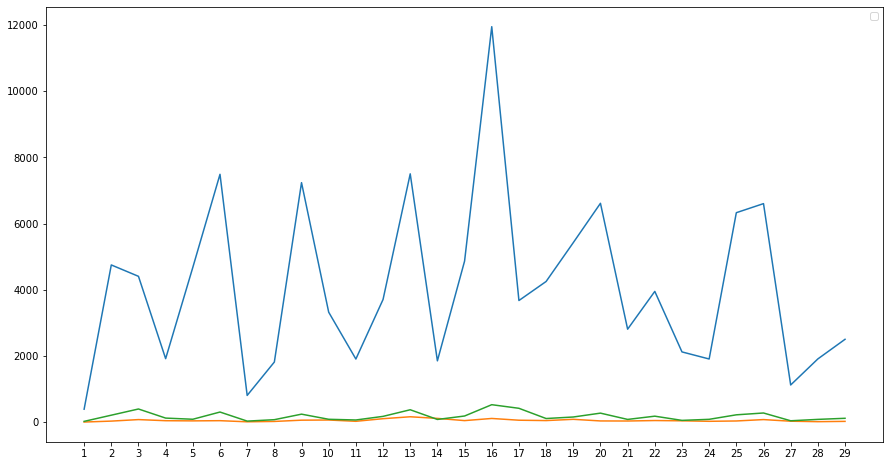

In [30]:
#Áï´Âúñ ÁúãÊï¥ÂÄãÊúàÊåâËÆö„ÄÅÂàÜ‰∫´„ÄÅË©ïË´ñÁöÑÊµÅÈáè
labels = [str(i) for i in range(1,30)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_highest['like_count'])
ax.plot(labels, results_highest['share_count'])
ax.plot(labels, results_highest['comment_count'])

ax.legend()

plt.show()

In [31]:
#10/17ËôüÂæàÊòéÈ°ØÊåâËÆöÊúÄÈ´ò  Âõ†Ê≠§ÊâæÂá∫ÈÄôÂ§©ÁöÑÊñáÁ´†
chen['new_date']=chen['new_date'].map(str) # turn 'new_date' into str
Oct_17 = chen[chen['new_date'] == "2019-10-17"]
Oct_17[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-31-193d8a2d9cd5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chen['new_date']=chen['new_date'].map(str) # turn 'new_date' into str


message  comment_count  \
6220  üèÜÈÇÑË®òÂæó‰∫≠Â¶ÉÂãáÂ•™‰∏≠ÁßãÁØÄÊ≠åÂî±Â§ßË≥ΩÂÜ†ËªçÂóéÔºüÂç≥Â∞áËàâËæ¶Âè∞ÁÅ£È†∏ÊûïÊäΩÁçéÊ¥ªÂãïÂõâÔºÅ „ÄÄ„ÄÄ„ÄÄ„ÄÄ„ÄÄ„ÄÄ„ÄÄ„ÄÄ„ÄÄ„ÄÄ È†ê...             58   
6221  „Äê‰Ω†ÁúüÁöÑÊúâÂ§•‰º¥Âóé?„Äë  2020ËóçÁ∂†Â∞çÊ±∫ÔºåÂúãÊ∞ëÈª®Á∏ΩÁµ±ÂÄôÈÅ∏‰∫∫ÈüìÂúãÁëúÁõÆÂâçÊ∞ëË™øËêΩÂæåÂ∞çÊâãËî°Ëã±ÊñáÔºåÊé•‰∏ã...             25   
6222  Âú®‰∫≠Â¶ÉÊ•µÂäõÁà≠Âèñ‰πã‰∏ãÔºåËá™‰æÜÊ∞¥ÂÖ¨Âè∏Á∑®Âàó7400Ëê¨ÂÖÉ„ÄÅÂÆâÂçóÂçÄÂèóÁõäÁî®Ê∞¥Êà∂Êï∏7500Êà∂Â±ÖÊ∞ëÁöÑÊ±∞ÊèõËÄÅËàäËá™...             22   
6223                              Êó©ÂÆâÔºÅ Âè∞ÁÅ£ÈöäÁöÑÂ§•‰º¥ÂÄë Âä†Ê≤πÔºÅÂä†Ê≤πÔºÅÂä†Ê≤πÔºÅ            159   
6224  ÁåúÁåúÊàëÂú®Âì™Ë£°Ôºü Ê≤íÈåØÔºÅÂ∞±ÊòØÂú®ÂÆ¢ÈÅã‰∏ä....  ÈõñÁÑ∂ÊúÄÊôö‰∏ÄÁè≠È´òÈêµÊ≤íÊê≠‰∏äÔºå‰ΩÜÈÇÑÊòØÊúâÂè¶‰∏ÄÁ®Æ‰∫§ÈÄöÂ∑•ÂÖ∑...            262   

      like_count  
6220        1927  
6221         851  
6222         675  
6223        4226  
6224        4270

1. ÊõùÂÖâÂ∫¶È´òÂ§öÁÇ∫Âú®Âú∞Ê∑±ËÄï
2. ÂπæÁØáÁ∏ΩÁµ±Â∏∂Â∞èÈõû
3. ËºÉÁÑ°‰∏≠ÂúãÂõ†Á¥†